### Inference Test

SwinTransformer 가 import 되지 않는 경우  

```pip install -r requirements.txt```  
```pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.5.0/index.html```

In [9]:
# ! pip install -r requirements.txt
# ! pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.5.0/index.html

In [1]:
# model lib import
from Models import * 
from SwinTransformer import *

# Dataset import 일반적인 데이터셋과 유사합니다! 
from Datasets import *


# inference_view test
from Utils import inference_view

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Dataset Load

- 이부분은 별도로 수정하셔도 됩니다! 
- 다만 Transform 부분에서 ToTensor 사용하셔야 됩니다. 
- 제가 사용한 모든 모델은 normalize를 사용하지 않고, /255 만 했습니다

In [2]:
from albumentations.pytorch import ToTensorV2

test_transform = A.Compose([
                           ToTensorV2()
                           ])
testdataset = RecylceDatasets(data_dir= '../input/data/test.json', mode = 'test', transform = test_transform, resize=256)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load_complete!


### Model Load

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SwinTransformerSmall() # Model 설정 Models.py 와 SwinTransformer.py 에서 보심됩니다
# Deeplabv3Plus_resnext50_32x4d 도 드렸습니다!


model_path = '/opt/ml/code/saved/[BEST]mIoU_swin_Small_allData.pt' # model 저장된 경로
# '/opt/ml/code/saved/mIoU_deeplabv3Plus_resnext50_32x4d_adamp_stepLR_transform.pt' 이는 deeplab 모델


# model 불러오기
print(device)
checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint)

# model.eval()

cuda


<All keys matched successfully>

### Inference viewer

- model (model): model 
- dataset (Datasets): dataset
- idx (int): dataset의 index 번호
- confidence_plot (bool) : 12개의 logit 값에 대한 시각화 결과 출력 여부
- result_plot (bool) : 입력 이미지와 최종 출력 결과 출력 여부

__return__ logits, label_map

Shape of Original Image : [3, 256, 256]
Shape of Predicted :  [1, 256, 256]
Unique values, category of transformed mask : 
 [{0, 'Background'}, {3, 'Paper'}]


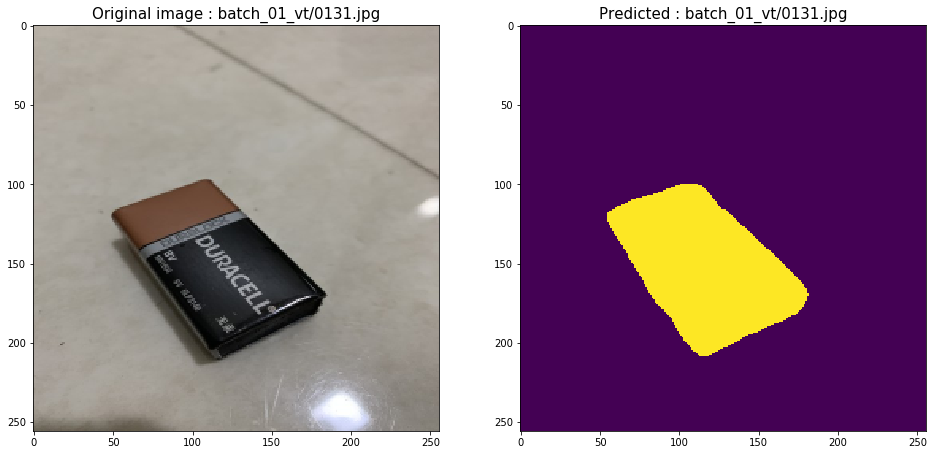

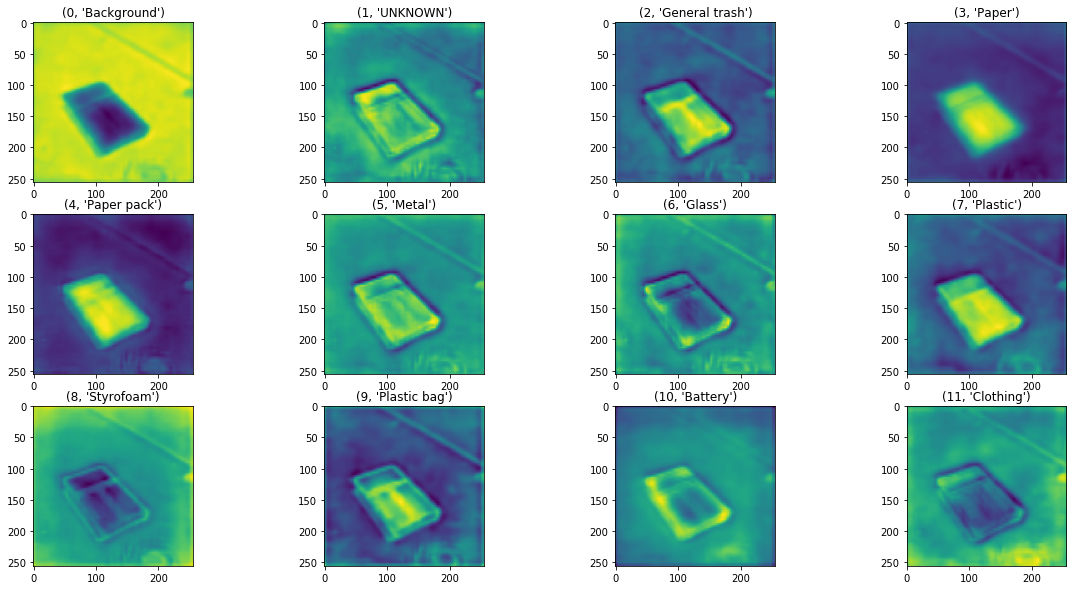

In [4]:
logits, label_map = inference_view(model=model, dataset=testdataset, idx = 10, confidence_plot=True)

In [7]:
print(logits.shape, label_map.shape)

torch.Size([1, 12, 256, 256]) (1, 256, 256)
